In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import turtle
import random
from copy import deepcopy

In [3]:
def init_positions(n, x_lower, x_upper, y_lower, y_upper):
    #Dictionary consisting of numpy arrays corresponding to x-y coordinates
    #of each agent
    
    positions = {}
    
    all_positions = [np.asarray([i,j]) for i in range(x_lower,x_upper) for j in range(y_lower,y_upper)]
    generated_positions = random.sample(all_positions, n)
    
    for i in range(n):
                
        positions[i] = generated_positions[i]
        
    return positions
    
def calculate_interagent_distance(n, positions):
    # Given : n x 2 matrix
    # return : n x n matrix
    
    interagent_distances = []
    for i in range(n):
        
        temporary_array = []
        for j in range(n):
            distance = np.linalg.norm(positions[i]-positions[j])
            temporary_array.append(distance)
            
        interagent_distances.append(temporary_array)
        
    return interagent_distances
            
    

def calculate_interagent_theta(n, positions):
    # Given : n x 2 matrix
    # return : n x n matrix
    interagent_angles = []
    for i in range(n):
        temporary_array = []
        for j in range(n):
            
            angle = math.degrees(math.atan2(positions[j][1]-positions[i][1],positions[j][0]-positions[i][0]))
            temporary_array.append(angle)
            
        interagent_angles.append(temporary_array)
    
    return interagent_angles

def calculate_force(distance, Fmax, R, G):
    if distance > 1.5*R:
        return 0.0
    
    else:
        F = G/(distance**2)
        if F > Fmax:
            F = Fmax
        
        if distance < R:
            F = -F
        
        return F
    
def update_velocity(fx, fy, dt):
    vx = dt*fx
    vy = dt*fy
    
    return vx, vy

def update_position(vx, vy, dt):
    x = dt*vx
    y = dt*vy
    
    return x,y

def distance_to_move(dx, dy):
    return math.floor(math.sqrt(dx**2+dy**2))
    
def bearing_angle(dx, dy):
    
    if dx < 0.0:
        return math.degrees(math.atan2(dy,dx)) + 180 
    return math.degrees(math.atan2(dy,dx))

In [5]:
def main(n, Fmax, R, G, time, dt):
    
    # initialise positions for all agents and agent velocities to zero and simulate
    positions = init_positions(n, 0, 10, 0, 10)
    
    list_of_dictionary_of_intermediate_positions = []
    list_of_dictionary_of_intermediate_positions.append(deepcopy(positions))
    
    for k in range(time):
        # calculate the distance, bearing of all robot for each robot - r,theta
        distances = calculate_interagent_distance(n,positions)
        bearing = calculate_interagent_theta(n,positions)
        # For each robot do the following :

        turn = [0 for i in range(n)]
        forward = [0 for i in range(n)]
        new_positions = [0 for i in range(n)]

        for i in range(n):
            vx = 0
            vy = 0
            # for each neighbouring agent do the following:
            fx = 0
            fy = 0
            for j in range(n):
                if j != i:
                    # calculate forces due to each robot
                    force = calculate_force(distances[i][j], Fmax, R, G)
                    # break into x,y component and calculate cummulative

                    angle_rad = math.radians(bearing[i][j])
                    fx += (force * math.cos(angle_rad))
                    fy += (force * math.sin(angle_rad))
            # calculate the updated velocity
            vx, vy = update_velocity(fx, fy, dt)
            # calculate new position of robot
            dx, dy = update_position(vx, vy, dt)
            # calculate, turn and distance to move for each agent

            turn[i] = bearing_angle(dx, dy)
            forward[i] = distance_to_move(dx, dy)
            new_positions[i] = np.asarray([positions[i][0]+dx,positions[i][1]+dy]) 


        # simulate movement and set velocity back to zero(friction)
        for i in range(n):
            positions[i] = new_positions[i]
            
        list_of_dictionary_of_intermediate_positions.append(deepcopy(positions))

    return list_of_dictionary_of_intermediate_positions


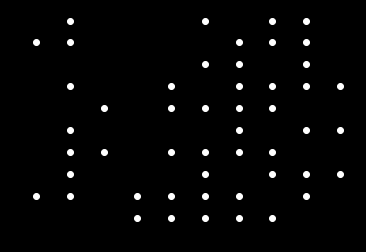

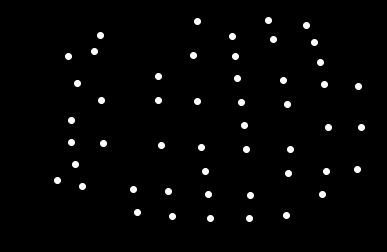

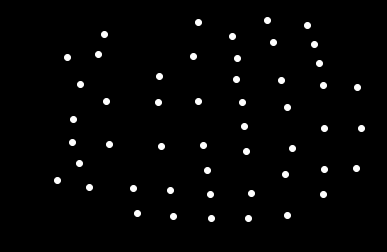

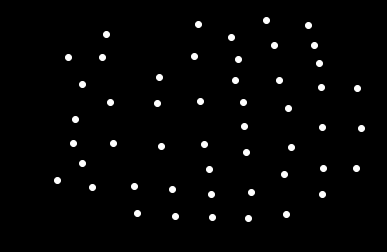

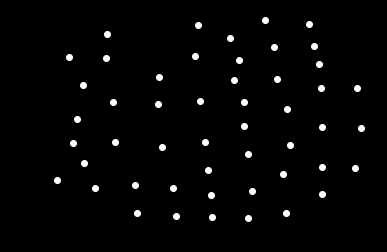

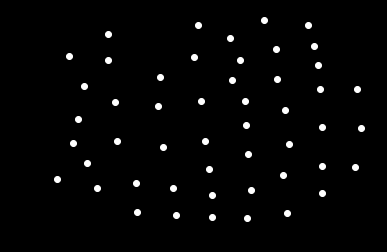

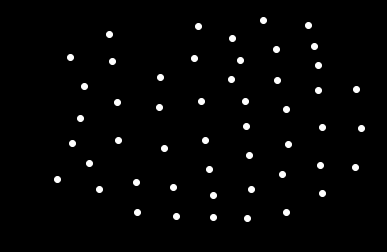

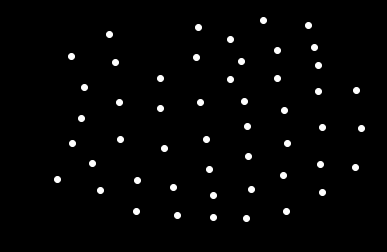

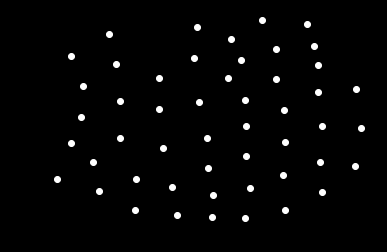

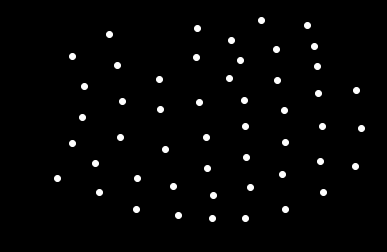

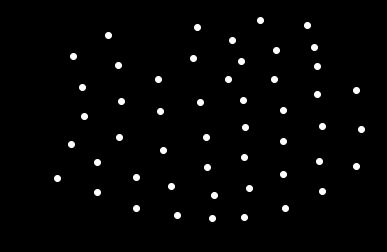

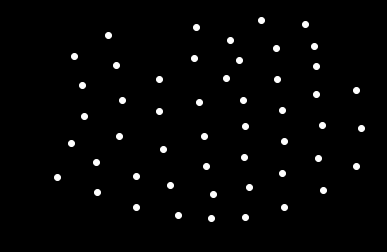

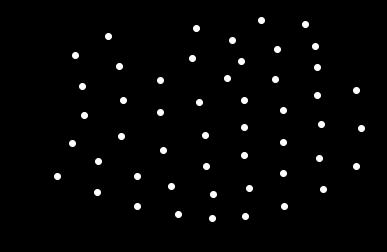

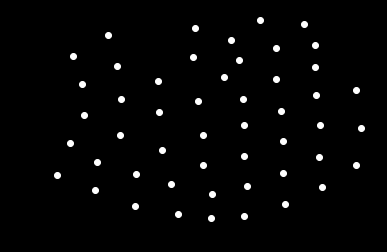

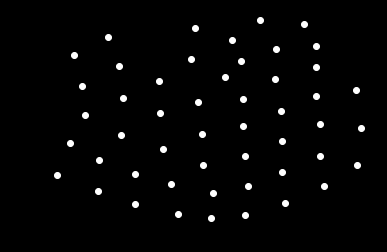

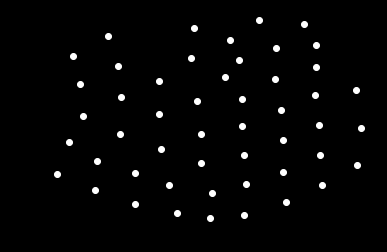

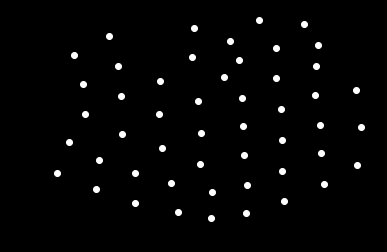

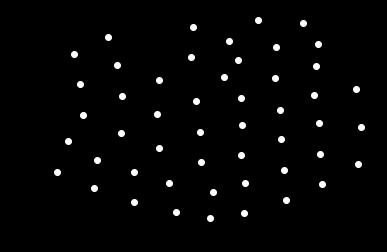

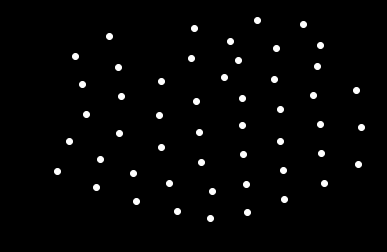

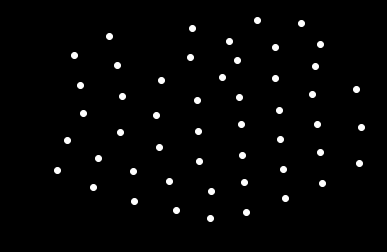

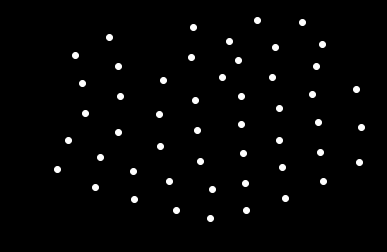

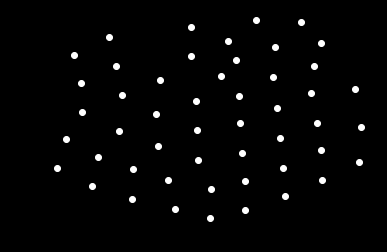

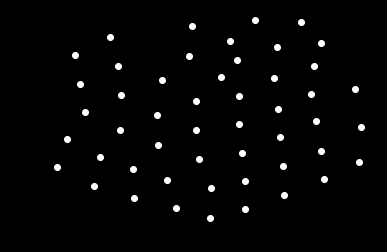

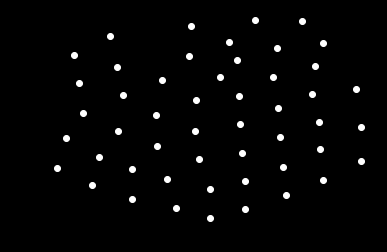

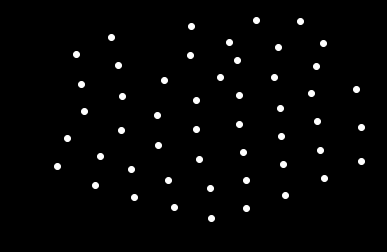

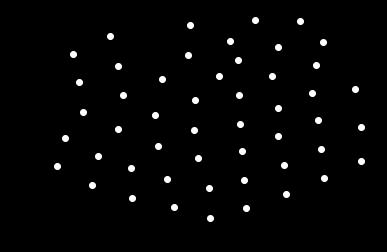

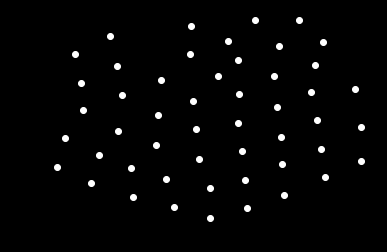

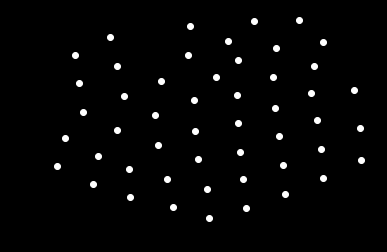

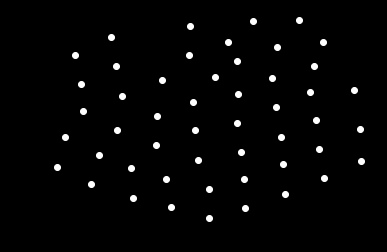

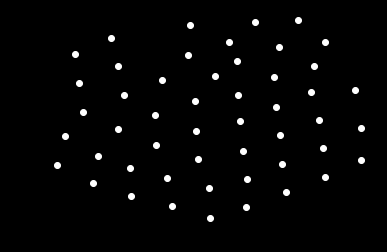

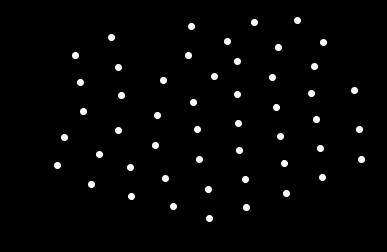

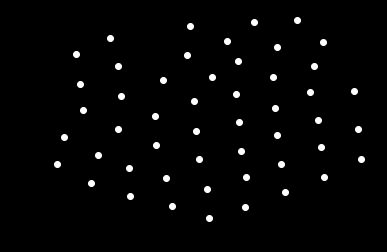

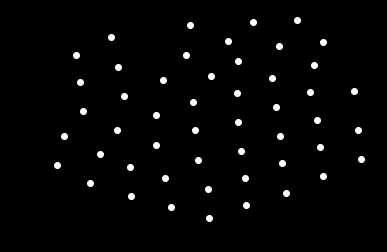

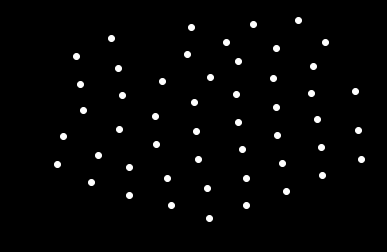

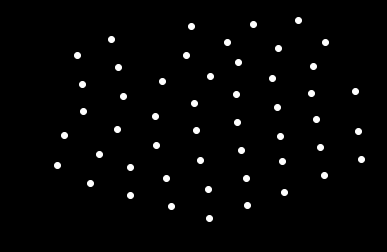

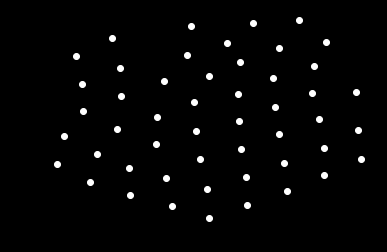

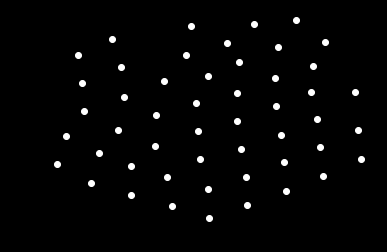

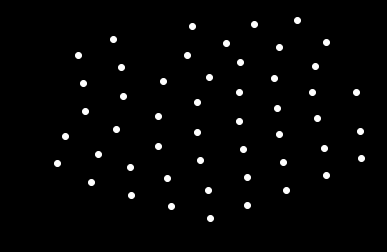

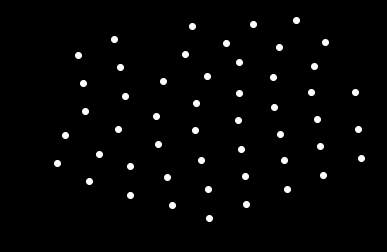

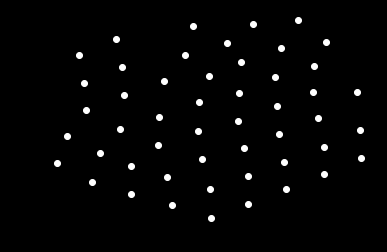

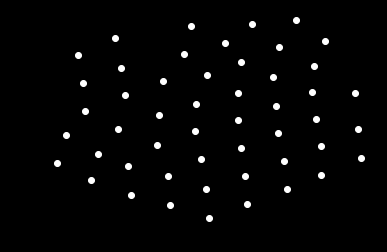

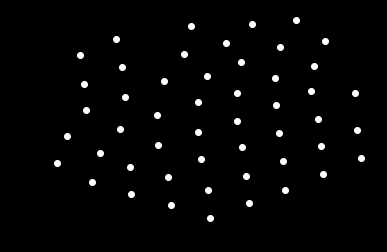

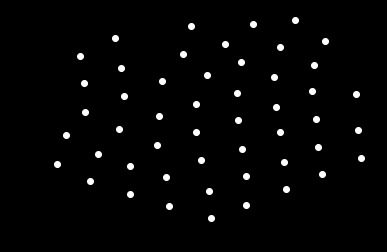

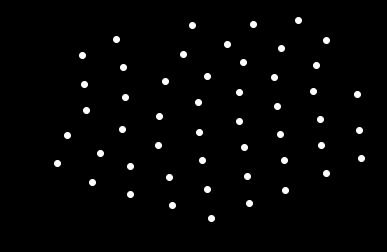

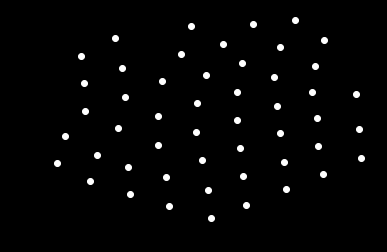

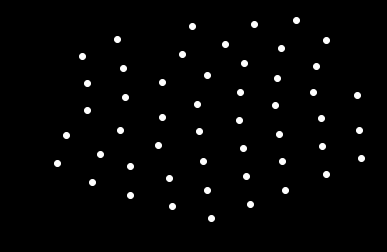

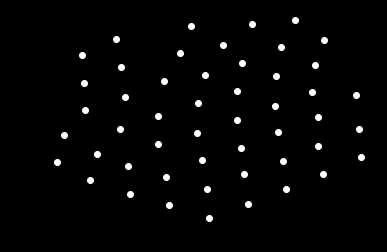

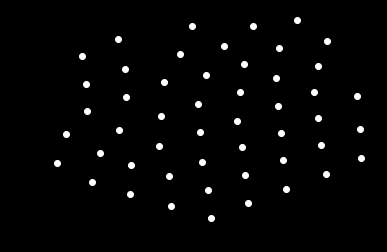

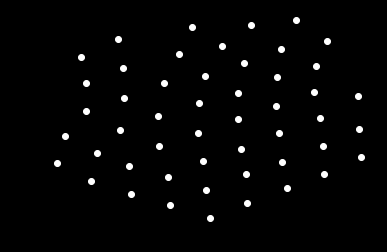

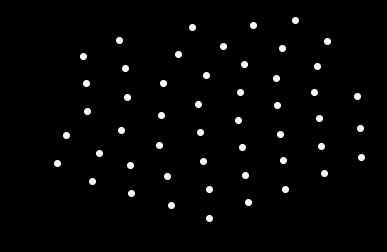

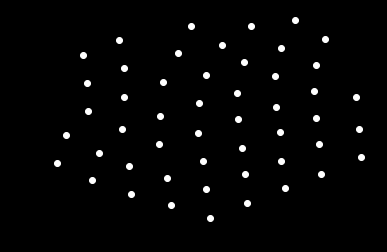

In [8]:
if __name__ == '__main__':
    n = 50
    plt.style.use('dark_background')
    list_of_dictionary_of_intermediate_positions = main(n, 1, 50, 506.25, 50, 2)
    
    for i in range(len(list_of_dictionary_of_intermediate_positions)):
        
        x = []
        y = []

        for j in range(n):
            x.append(list_of_dictionary_of_intermediate_positions[i][j][0])
            y.append(list_of_dictionary_of_intermediate_positions[i][j][1])
    
        plt.scatter(x,y,color='#FFFFFF')
        plt.axis('off')
        plt.savefig(str(i)+'.png')
        plt.show()